# **EDA**

### **Prepare data**

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('Tweets_cleaned_data.csv')

In [3]:
data

,target,id,date,flag,user,text,text2,text3,hashtags,tokens,tokens_remove_stopwords,length_1
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...,thats a bummer you got carr of third day to do...,NaN,"['thats', 'a', 'bummer', 'you', 'got', 'carr',...","['thats', 'bummer', 'got', 'carr', 'third', 'd...",6
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his by it and mig...,NaN,"['is', 'upset', 'that', 'he', 'cant', 'update'...","['upset', 'cant', 'update', 'might', 'cry', 'r...",10
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,i many times for the ball to save the rest go ...,NaN,"['i', 'many', 'times', 'for', 'the', 'ball', '...","['many', 'times', 'ball', 'save', 'rest', 'go']",6
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body itchy and like its on fire,NaN,"['my', 'whole', 'body', 'itchy', 'and', 'like'...","['whole', 'body', 'itchy', 'like', 'fire']",5
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,no its not at all mad why am i here because i ...,NaN,"['no', 'its', 'not', 'at', 'all', 'mad', 'why'...","['mad', 'cant', 'see']",3
...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,just woke up no school is the best feeling ever,NaN,"['just', 'woke', 'up', 'no', 'school', 'is', '...","['woke', 'school', 'best', 'feeling', 'ever']",5
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews,very cool to hear old walt,NaN,"['very', 'cool', 'to', 'hear', 'old', 'walt']","['cool', 'hear', 'old', 'walt']",4
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,are you ready for your mojo ask me for,NaN,"['are', 'you', 'ready', 'for', 'your', 'mojo',...","['ready', 'mojo', 'ask']",3
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,happy birthday to my boo of time,NaN,"['happy', 'birthday', 'to', 'my', 'boo', 'of',...","['happy', 'birthday', 'boo', 'time']",4


In [4]:
new = data['date'].str.split(" ", expand = True)

In [5]:
new

,0,1,2,3,4,5
0,Mon,Apr,06,22:19:45,PDT,2009
1,Mon,Apr,06,22:19:49,PDT,2009
2,Mon,Apr,06,22:19:53,PDT,2009
3,Mon,Apr,06,22:19:57,PDT,2009
4,Mon,Apr,06,22:19:57,PDT,2009
...,...,...,...,...,...,...
1599995,Tue,Jun,16,08:40:49,PDT,2009
1599996,Tue,Jun,16,08:40:49,PDT,2009
1599997,Tue,Jun,16,08:40:49,PDT,2009
1599998,Tue,Jun,16,08:40:49,PDT,2009


In [6]:
data['day'] = new[0]
data['month'] = new[1]
data['hours'] = new[3].str.split(":").str[0]

### **Number of tweets per week day**

In [7]:
data['day'] = pd.Categorical(data['day'], categories=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],ordered=True)

<AxesSubplot:title={'center':'Number of tweets per week day'}, xlabel='day'>

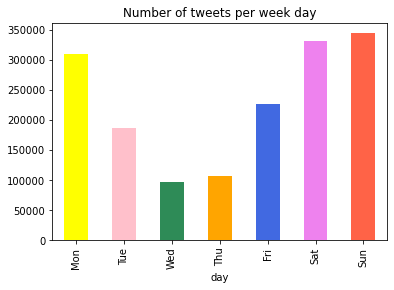

In [8]:
colors = ["yellow","pink","seagreen","orange","royalblue","violet","tomato"]

data['day'].groupby(data['day']).count().plot(kind="bar", 
                                              title="Number of tweets per week day", 
                                              color=colors)

### **Peak times to tweet in each week day**

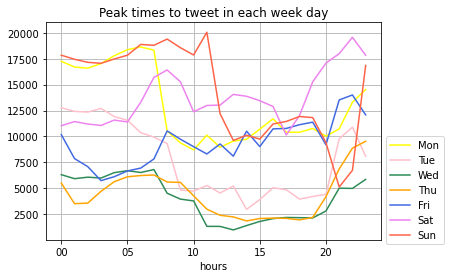

In [9]:
data.pivot_table(index = 'hours',
                 columns = 'day',
                 aggfunc={'hours':len})['hours'].sort_index()\
    .plot(kind="line", grid=True, color=colors, title="Peak times to tweet in each week day")\
    .legend(bbox_to_anchor=(1.0, 0.5))

### **Tweet length distributions**

<AxesSubplot:title={'center':'Tweet length distributions'}, ylabel='Frequency'>

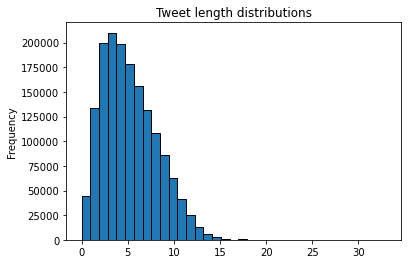

In [10]:
data['length_1'].plot(kind='hist', bins=35, title="Tweet length distributions", edgecolor='black')

### **Tweets per Twitter account**

In [18]:
data['user'].describe()

count      1600000
unique      659775
top       lost_dog
freq           549
Name: user, dtype: object

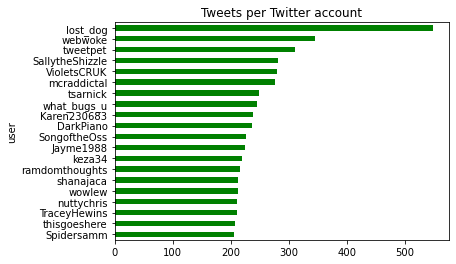

In [43]:
data['user'].value_counts().head(20).plot(kind="barh", title="Tweets per Twitter account", color="green").invert_yaxis()